XGBoost without spark

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

  # Load the data
data = pd.read_csv('/content/drive/MyDrive/UCI_Credit_Card.csv')
data.head()
# Drop irrelevant columns
data_cleaned = data.drop(columns=['ID'])

data_cleaned.head()

# Separate features and target variable
X = data_cleaned.drop('default.payment.next.month', axis=1)
y = data_cleaned['default.payment.next.month']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


data.info()
data_cleaned.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

Calcul de la matrice de corrélation

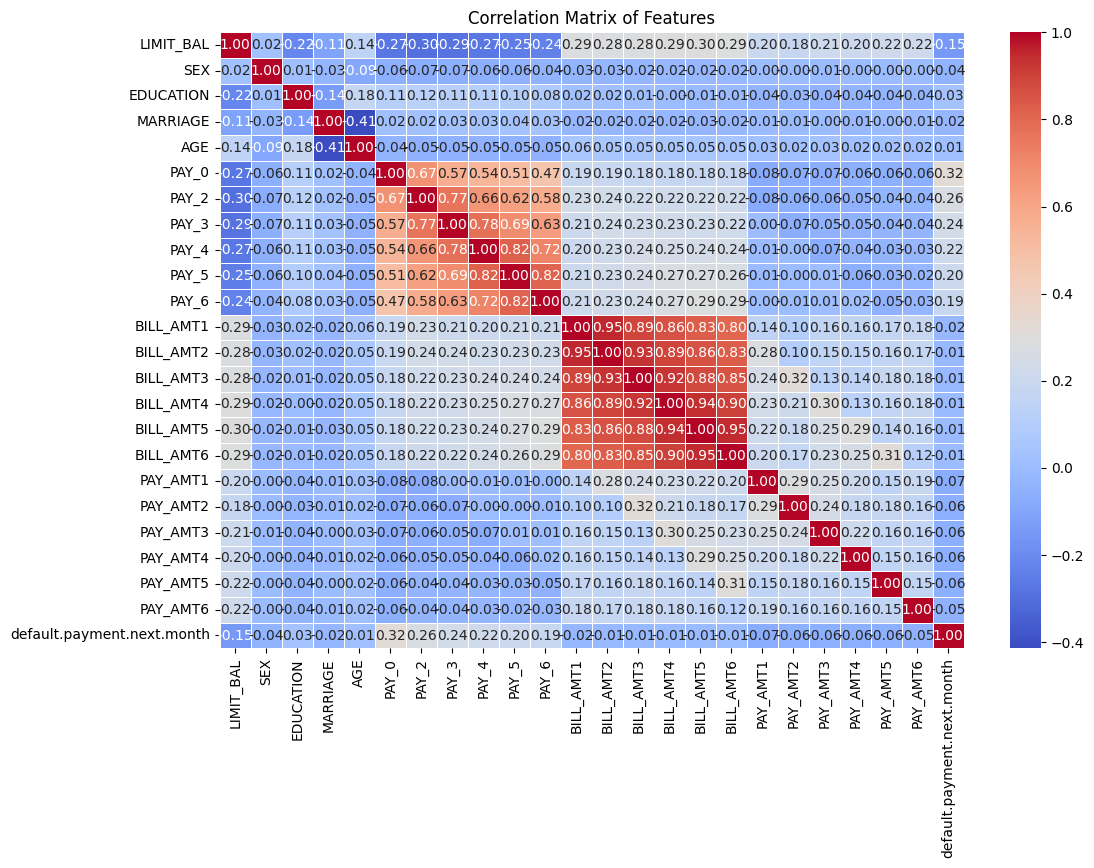

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns



# Calculate the correlation matrix

correlation_matrix = data_cleaned.corr()



# Plot the heatmap to visualize correlations between variables

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Features")

plt.show()

Suppression des deux features sex et id

In [ ]:
# Remove the 'SEX' column from the features
X_optimized = X.drop(columns=['SEX'])
# Split the optimized dataset into training and testing sets
X_train_opt, X_test_opt, y_train, y_test = train_test_split(X_optimized, y, test_size=0.2, random_state=42)
# Scale the numeric features again after removing 'Experience'

# Scale the numeric features for better model performance
scaler = StandardScaler()
X_train_opt_scaled = scaler.fit_transform(X_train_opt)
X_test_opt_scaled = scaler.transform(X_test_opt)

 création de nouvelle feature  'age-group' en groupant 'AGE'


In [ ]:
# Create a new feature 'age-group' by grouping 'AGE'



def AGE_GROUP(AGE):
    if AGE<= 35:
        return 'Young'
    elif AGE <= 55:
        return 'Middle-aged'
    else:
        return 'Senior'

data_cleaned['AGE-GROUP'] = data_cleaned['AGE'].apply(AGE_GROUP)

# Display the first few rows to confirm the new features
data_cleaned[['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'AGE-GROUP']].head()


,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,AGE-GROUP
0,20000.0,2,1,24,Young
1,120000.0,2,2,26,Young
2,90000.0,2,2,34,Young
3,50000.0,2,1,37,Middle-aged
4,50000.0,2,1,57,Senior


Elimination ds valeurs aberrantes

In [ ]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# List of features to analyze for outliers
features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
            'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Detect outliers for each feature and calculate the bounds
outlier_summary = {'Feature': [], 'Lower Bound': [], 'Upper Bound': [], 'Number of Outliers': []}

for feature in features:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(data_cleaned, feature)
    outlier_summary['Feature'].append(feature)
    outlier_summary['Lower Bound'].append(lower_bound)
    outlier_summary['Upper Bound'].append(upper_bound)
    outlier_summary['Number of Outliers'].append(len(outliers))

# Convert to DataFrame for better readability
import pandas as pd

outlier_summary_df = pd.DataFrame(outlier_summary)
print(outlier_summary_df)


      Feature  Lower Bound  Upper Bound  Number of Outliers
0       PAY_0       -2.500        1.500                3130
1       PAY_2       -2.500        1.500                4410
2       PAY_3       -2.500        1.500                4209
3       PAY_4       -2.500        1.500                3508
4       PAY_5       -2.500        1.500                2968
5       PAY_6       -2.500        1.500                3079
6   LIMIT_BAL  -235000.000   525000.000                 167
7         AGE        8.500       60.500                 272
8   BILL_AMT1   -91739.625   162389.375                2400
9   BILL_AMT2   -88547.500   155538.500                2395
10  BILL_AMT3   -83581.500   146412.500                2469
11  BILL_AMT4   -75942.125   132774.875                2622
12  BILL_AMT5   -70878.250   122831.750                2725
13  BILL_AMT6   -70657.375   121111.625                2693


In [ ]:
!pip install imbalanced-learn

Division du dataset en train et test sets

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Check the initial class distribution for 'Personal.Loan'
class_distribution = Counter(y_train)

# Apply SMOTE to the training set to balance classes
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(X_train_opt_scaled, y_train)

# Check the new class distribution after applying SMOTE
balanced_class_distribution = Counter(y_train_balanced)

print("Original Class Distribution:", class_distribution)
print("Balanced Class Distribution:", balanced_class_distribution)



Original Class Distribution: Counter({0: 18677, 1: 5323})
Balanced Class Distribution: Counter({0: 18677, 1: 18677})


Comparaison entre les performances des differents modèles de prédiction et choix d'un seul

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
class_distribution = Counter(y_train)
scaler = StandardScaler()
X_train_opt_scaled = scaler.fit_transform(X_train)
X_test_opt_scaled = scaler.transform(X_test)


# Define the models and hyperparameters for tuning
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
            "C": [0.1, 1, 10, 100],
            "solver": ["liblinear", "lbfgs"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20, 30]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "params": {
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7],
            "n_estimators": [50, 100, 200]
        }
    }
}

# Initialize dictionaries to store best models and their performance
best_models = {}
results = {}

# Perform GridSearchCV for each model
for model_name, model_info in models.items():
    clf = GridSearchCV(model_info["model"], model_info["params"], cv=5, scoring="roc_auc", n_jobs=-1, verbose=1)
    clf.fit(X_train_opt_scaled, y_train)
    best_models[model_name] = clf.best_estimator_
    y_pred = clf.predict(X_test_opt_scaled)
    results[model_name] = {
        "Best Params": clf.best_params_,
        "Classification Report": classification_report(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, clf.predict_proba(X_test_opt_scaled)[:, 1])
    }

results


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[15:07:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




{'Logistic Regression': {'Best Params': {'C': 100, 'solver': 'liblinear'},
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.82      0.97      0.89      4687\n           1       0.69      0.24      0.35      1313\n\n    accuracy                           0.81      6000\n   macro avg       0.76      0.60      0.62      6000\nweighted avg       0.79      0.81      0.77      6000\n',
  'ROC-AUC': 0.7269467768361907},
 'Random Forest': {'Best Params': {'max_depth': 10, 'n_estimators': 200},
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.84      0.95      0.89      4687\n           1       0.66      0.35      0.46      1313\n\n    accuracy                           0.82      6000\n   macro avg       0.75      0.65      0.68      6000\nweighted avg       0.80      0.82      0.80      6000\n',
  'ROC-AUC': 0.7778667348279527},
 'XGBoost': {'Best Params': {'learning_rate': 0.1,
  

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Data Preprocessing
class_distribution = Counter(y_train)  # Assuming y_train is defined
scaler = StandardScaler()
X_train_opt_scaled = scaler.fit_transform(X_train)  # Assuming X_train is defined
X_test_opt_scaled = scaler.transform(X_test)  # Assuming X_test is defined

# Define the models and hyperparameters for tuning
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
            "C": [0.1, 1, 10, 100],
            "solver": ["liblinear", "lbfgs"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20, 30]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "params": {
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7],
            "n_estimators": [50, 100, 200]
        }
    }
}

# Dictionary to store best models and their performance
results = {}

# Perform GridSearchCV for each model
for model_name, model_info in models.items():
    print(f"Starting GridSearchCV for {model_name}...")
    clf = GridSearchCV(model_info["model"], model_info["params"], cv=5, scoring="roc_auc", n_jobs=-1, verbose=1)
    clf.fit(X_train_opt_scaled, y_train)
    y_pred = clf.predict(X_test_opt_scaled)

    # Populate the results dictionary
    results[model_name] = {
        "Best Params": clf.best_params_,
        "Classification Report": classification_report(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, clf.predict_proba(X_test_opt_scaled)[:, 1])
    }

# Display results (if needed later)
def display_model_results(results_dict):
    for model_name, model_results in results_dict.items():
        print(f"\n{'='*40}")
        print(f"Model: {model_name}")
        print(f"{'='*40}")

        # Display Best Parameters
        print("\nBest Parameters:")
        for param, value in model_results['Best Params'].items():
            print(f"  {param}: {value}")

        # Display ROC-AUC Score
        print(f"\nROC-AUC Score: {model_results['ROC-AUC']:.4f}")

        # Display Classification Report
        print("\nClassification Report:")
        print(model_results["Classification Report"])

# Call the display function to see results
display_model_results(results)


Starting GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Starting GridSearchCV for Random Forest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Starting GridSearchCV for XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Model: Logistic Regression

Best Parameters:
  C: 100
  solver: liblinear

ROC-AUC Score: 0.7269

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000


Model: Random Forest

Best Parameters:
  max_depth: 10
  n_estimators: 200

ROC-AUC Score: 0.7779

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
       

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[15:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

def display_model_results(results_dict):
    for model_name, model_results in results_dict.items():
        print(f"\n{'='*40}")
        print(f"Model: {model_name}")
        print(f"{'='*40}")

        # Display Best Parameters
        print("\nBest Parameters:")
        for param, value in model_results['Best Params'].items():
            print(f"  {param}: {value}")

        # Display ROC-AUC Score
        print(f"\nROC-AUC Score: {model_results['ROC-AUC']:.4f}")

# Helper function to convert classification report string to DataFrame
def classification_report_to_df(report_str):
    # Parse the classification report string to a DataFrame
    report_data = []
    lines = report_str.split('\n')
    for line in lines[2:len(lines)-3]:  # Skip header and footer lines
        row = {}
        row_data = line.split()
        if len(row_data) < 2:
            continue
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1-score'] = float(row_data[3])
        row['support'] = int(row_data[4])
        report_data.append(row)
    return pd.DataFrame.from_dict(report_data)

display_model_results(results)


Model: Logistic Regression

Best Parameters:
  C: 100
  solver: liblinear

ROC-AUC Score: 0.7269

Model: Random Forest

Best Parameters:
  max_depth: 10
  n_estimators: 200

ROC-AUC Score: 0.7779

Model: XGBoost

Best Parameters:
  learning_rate: 0.1
  max_depth: 5
  n_estimators: 50

ROC-AUC Score: 0.7846


In [ ]:
# Re-running the model selection and tuning process due to the previous connection error

# Since we already defined models and parameters, retrying GridSearchCV for each model
best_models = {}
results = {}

try:
    for model_name, model_info in models.items():
        clf = GridSearchCV(model_info["model"], model_info["params"], cv=5, scoring="roc_auc", n_jobs=-1, verbose=1)
        clf.fit(X_train_opt_scaled, y_train)
        best_models[model_name] = clf.best_estimator_
        y_pred = clf.predict(X_test_opt_scaled)
        results[model_name] = {
            "Best Params": clf.best_params_,
            "Classification Report": classification_report(y_test, y_pred),
            "ROC-AUC": roc_auc_score(y_test, clf.predict_proba(X_test_opt_scaled)[:, 1])
        }
except Exception as e:
    results = str(e)

results

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[15:20:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




{'Logistic Regression': {'Best Params': {'C': 100, 'solver': 'liblinear'},
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.82      0.97      0.89      4687\n           1       0.69      0.24      0.35      1313\n\n    accuracy                           0.81      6000\n   macro avg       0.76      0.60      0.62      6000\nweighted avg       0.79      0.81      0.77      6000\n',
  'ROC-AUC': 0.7269467768361907},
 'Random Forest': {'Best Params': {'max_depth': 10, 'n_estimators': 200},
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.84      0.95      0.89      4687\n           1       0.66      0.35      0.46      1313\n\n    accuracy                           0.82      6000\n   macro avg       0.75      0.65      0.68      6000\nweighted avg       0.80      0.82      0.80      6000\n',
  'ROC-AUC': 0.7778667348279527},
 'XGBoost': {'Best Params': {'learning_rate': 0.1,
  

Calcul de la matrice de confusion, de l'importance des paramètres et la courbe AUC

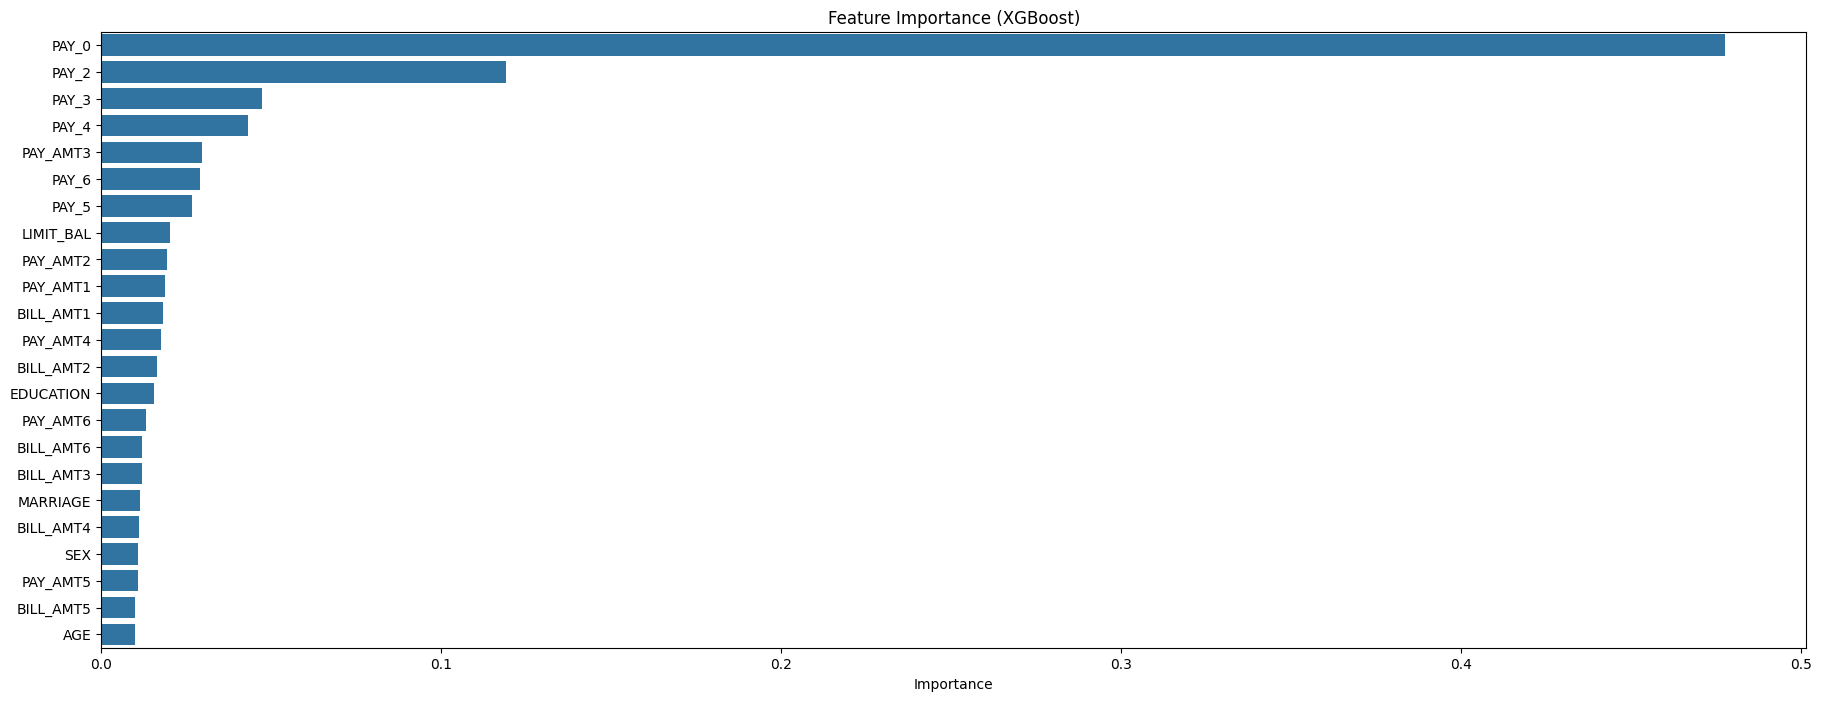

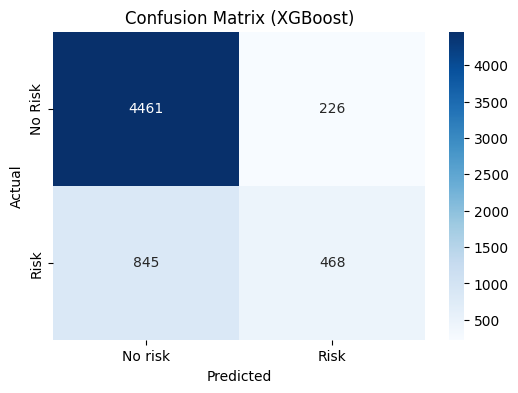

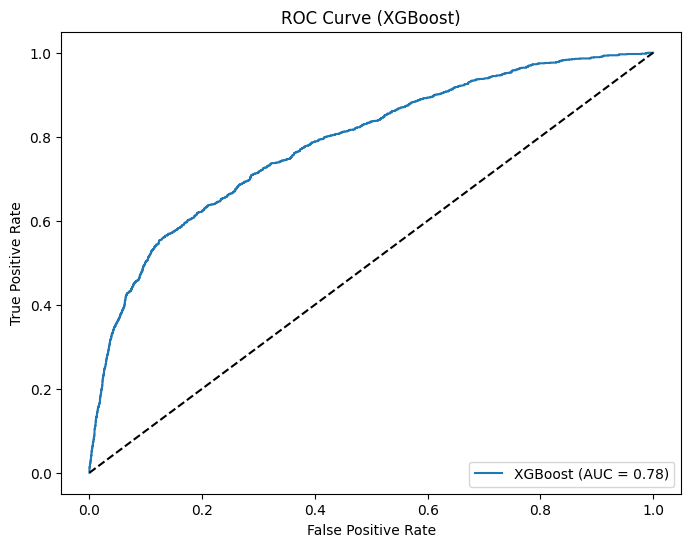

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
import numpy as np

# Feature Importance using XGBOOST
best_rf_model = best_models["XGBoost"]
feature_importances = best_rf_model.feature_importances_
#features = X_train_opt.columns  # Get feature names from the training set
features = X_train.columns

# Sort features by importance
indices = np.argsort(feature_importances)[::-1]
sorted_features = [features[i] for i in indices]
sorted_importances = feature_importances[indices]

# Plot Feature Importance
plt.figure(figsize=(22, 8))
sns.barplot(x=sorted_importances, y=sorted_features)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance")
plt.show()

# Comprehensive Evaluation: Confusion Matrix
y_pred_rf = best_rf_model.predict(X_test_opt_scaled)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No risk", "Risk"], yticklabels=["No Risk", "Risk"])
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve and AUC
y_prob_rf = best_rf_model.predict_proba(X_test_opt_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost)")
plt.legend(loc="lower right")
plt.show()

Calcul de l'accuracy du modele XGBoost choisi

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy of the XGBoost model on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf


0.8215

Exemple d'utilisation du modèle pour la prédiction

In [ ]:
import joblib



# Assuming X_train has all the original features
# Get the feature names used during training
feature_names = X_train.columns

# Create a dictionary mapping feature names to values in example_features
# Adjust the mapping based on the actual meaning of your example_features values
# For demonstration, I'm assuming the first 10 features are used:
example_features_dict = dict(zip(feature_names[:10], [5, 1, 3, 5, 1, 4, 0, 2, 1, 1]))

# Create a DataFrame with the correct feature names and values
example_df = pd.DataFrame([example_features_dict])


# Assuming 'best_rf_model' is your trained XGBoost model
joblib.dump(best_rf_model, 'model.joblib')  # Save the model
# Load the model
loaded_model = joblib.load('model.joblib')
# Make sure the example_df has all the features the model expects
# Fill missing columns with 0 or appropriate values
for feature in feature_names:
    if feature not in example_df.columns:
        example_df[feature] = 0  # Or an appropriate value

# Now predict using the DataFrame
prediction = loaded_model.predict(example_df)

if prediction[0] == 0:
    print("No risk")
else:
    print("risk")
print("Prediction:", prediction[0])

No risk
Prediction: 0


XGBoost X Spark

In [ ]:
!pip install pyspark
!pip install xgboost

In [ ]:
# Install or upgrade PySpark
!pip install --upgrade pyspark

# Install or upgrade XGBoost with Spark support
!pip install --upgrade xgboost


In [ ]:
!pip install cudf-cu11 dask-cudf-cu11 --extra-index-url=https://pypi.nvidia.com
!pip install pyspark pandas plotly


Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.8/452.8 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.5/36.5 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.5/28.5 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.5/244.5 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 

In [ ]:
import cudf, pandas, pyspark,xgboost
print(cudf.__version__, pyspark.__version__)


24.12.00 3.5.3


In [ ]:
!pip install plotly
import plotly.express as px


Import du dataset pour l'utiliser avec spark

In [ ]:
from pyspark.sql import SparkSession

file_path = '/content/drive/MyDrive/UCI_Credit_Card.csv'

# Initialize Spark Session
spark = SparkSession.builder.appName("CreditCardDefault").getOrCreate()

# Load data into Spark DataFrame
df= spark.read.csv(file_path, header=True, inferSchema=True)

# Show first few rows
df.show(5)
# Print the schema to verify column data types
df.printSchema()

# Count the number of rows in the dataset
row_count = df.count()
print(f"Total number of rows in the dataset: {row_count}")


+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|default.payment.next.month|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
|  1|  20000.0|  2|        2|       1| 24|    2|    2|   -1|   -1|   -2|   -2|   3913.0|   3102.0|    689.0|      0.0|      0.0|      0.0|     0.0|   689.0|     0.0|     0.0|     0.0|     0.0|                         1|
|  2| 120000.0|  2|        2|       2| 26|   -1|    2|    0|    0|    0|    2|   2682.0|   1725.0|   2682.0|   3272.0|  

Suppression des parametres sex et id et ajout de Age-group

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

for col_name in df.columns:
    if "." in col_name:
        df = df.withColumnRenamed(col_name, col_name.replace(".", "_"))
label_name = "default_payment_next_month"

# Drop two columns from the DataFrame
columns_to_drop = ["Sex", "ID"]  # Replace with actual column names based on your dataset
df = df.drop(*columns_to_drop)

# Define the UDF for AGE_GROUP
def age_group(AGE):
    if AGE <= 35:
        return 'Young'
    elif AGE <= 55:
        return 'Middle-aged'
    else:
        return 'Senior'

# Register the UDF
age_group_udf = udf(age_group, StringType())
df = df.withColumn('AGE_GROUP', age_group_udf(df['AGE']))

# Show the updated DataFrame with the new column
df.select('LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'AGE_GROUP').show(5)

# Print the schema to confirm columns are dropped
df.printSchema()



+---------+---------+--------+---+-----------+
|LIMIT_BAL|EDUCATION|MARRIAGE|AGE|  AGE_GROUP|
+---------+---------+--------+---+-----------+
|  20000.0|        2|       1| 24|      Young|
| 120000.0|        2|       2| 26|      Young|
|  90000.0|        2|       2| 34|      Young|
|  50000.0|        2|       1| 37|Middle-aged|
|  50000.0|        2|       1| 57|     Senior|
+---------+---------+--------+---+-----------+
only showing top 5 rows

root
 |-- LIMIT_BAL: double (nullable = true)
 |-- EDUCATION: integer (nullable = true)
 |-- MARRIAGE: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_0: integer (nullable = true)
 |-- PAY_2: integer (nullable = true)
 |-- PAY_3: integer (nullable = true)
 |-- PAY_4: integer (nullable = true)
 |-- PAY_5: integer (nullable = true)
 |-- PAY_6: integer (nullable = true)
 |-- BILL_AMT1: double (nullable = true)
 |-- BILL_AMT2: double (nullable = true)
 |-- BILL_AMT3: double (nullable = true)
 |-- BILL_AMT4: double (nullable = t

Division du dataset en train et test sets

In [ ]:
# Split the data into training and test sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Show the number of records in each set to confirm
print(f"Training Data Count: {train_data.count()}")
print(f"Test Data Count: {test_data.count()}")
label_name = "default_payment_next_month"

# Get a list with feature column names (excluding label column)
feature_names = [x for x in df.columns if x != label_name]



# Display the schema of the dataset
df.printSchema()

# Show the first few rows of training data
train_data.show(5)

# Show the first few rows of test data
test_data.show(5)


Training Data Count: 24032
Test Data Count: 5968
root
 |-- LIMIT_BAL: double (nullable = true)
 |-- EDUCATION: integer (nullable = true)
 |-- MARRIAGE: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_0: integer (nullable = true)
 |-- PAY_2: integer (nullable = true)
 |-- PAY_3: integer (nullable = true)
 |-- PAY_4: integer (nullable = true)
 |-- PAY_5: integer (nullable = true)
 |-- PAY_6: integer (nullable = true)
 |-- BILL_AMT1: double (nullable = true)
 |-- BILL_AMT2: double (nullable = true)
 |-- BILL_AMT3: double (nullable = true)
 |-- BILL_AMT4: double (nullable = true)
 |-- BILL_AMT5: double (nullable = true)
 |-- BILL_AMT6: double (nullable = true)
 |-- PAY_AMT1: double (nullable = true)
 |-- PAY_AMT2: double (nullable = true)
 |-- PAY_AMT3: double (nullable = true)
 |-- PAY_AMT4: double (nullable = true)
 |-- PAY_AMT5: double (nullable = true)
 |-- PAY_AMT6: double (nullable = true)
 |-- default_payment_next_month: integer (nullable = true)
 |-- AGE_GROU

Elimination des outliers

In [ ]:
from pyspark.sql import Row
from pyspark.sql.types import FloatType, IntegerType, StringType, StructType, StructField

# Explicitly cast the values to PySpark-compatible data types
rows = [
    {
        "Feature": str(outlier_summary["Feature"][i]),
        "Lower Bound": float(outlier_summary["Lower Bound"][i]),
        "Upper Bound": float(outlier_summary["Upper Bound"][i]),
        "Number of Outliers": int(outlier_summary["Number of Outliers"][i]),
    }
    for i in range(len(outlier_summary["Feature"]))
]

# Define the schema explicitly
schema = StructType([
    StructField("Feature", StringType(), True),
    StructField("Lower Bound", FloatType(), True),
    StructField("Upper Bound", FloatType(), True),
    StructField("Number of Outliers", IntegerType(), True),
])

# Create DataFrame using the schema
outlier_summary_df = spark.createDataFrame(rows, schema=schema)

# Display the DataFrame
outlier_summary_df.show()



+---------+-----------+-----------+------------------+
|  Feature|Lower Bound|Upper Bound|Number of Outliers|
+---------+-----------+-----------+------------------+
|    PAY_0|       -2.5|        1.5|              3130|
|    PAY_2|       -2.5|        1.5|              4410|
|    PAY_3|       -2.5|        1.5|              4209|
|    PAY_4|       -2.5|        1.5|              3508|
|    PAY_5|       -2.5|        1.5|              2968|
|    PAY_6|       -2.5|        1.5|              3079|
|LIMIT_BAL|  -235000.0|   525000.0|               167|
|      AGE|        8.5|       60.5|               272|
|BILL_AMT1| -91739.625|  162389.38|              2400|
|BILL_AMT2|   -88547.5|   155538.5|              2395|
|BILL_AMT3|   -83581.5|   146412.5|              2469|
|BILL_AMT4| -75942.125|  132774.88|              2622|
|BILL_AMT5|  -70878.25|  122831.75|              2725|
|BILL_AMT6| -70657.375| 121111.625|              2693|
+---------+-----------+-----------+------------------+



Application de calcul de la moyenne  des dettes par age

In [ ]:
import time
from pyspark.sql import functions as F

# Start time to measure execution duration
start_time = time.time()

# Perform a group operation in PySpark (calculate the average 'LIMIT_BAL' for each 'AGE')
result_spark = df.groupBy('AGE').agg(F.avg('LIMIT_BAL').alias('avg_LIMIT_BAL'))

# Display the result (optional)
result_spark.show()

# End time to measure execution duration
end_time = time.time()

# Print the execution time
print(f"Temps d'exécution avec PySpark : {end_time - start_time:.2f} secondes")

+---+------------------+
|AGE|     avg_LIMIT_BAL|
+---+------------------+
| 31|193755.13557929333|
| 65|201666.66666666666|
| 53|174461.53846153847|
| 34|199388.98450946645|
| 28|170943.93186657203|
| 26|128813.69426751592|
| 27|147941.77386594447|
| 44|          186600.0|
| 22| 37928.57142857143|
| 47|167924.15169660677|
| 52|153618.42105263157|
| 40|188448.27586206896|
| 57|160819.67213114753|
| 54| 171700.4048582996|
| 48| 168703.8626609442|
| 64|232258.06451612903|
| 41|189672.33009708737|
| 43|180850.74626865672|
| 37|200566.76272814602|
| 61| 184285.7142857143|
+---+------------------+
only showing top 20 rows

Temps d'exécution avec PySpark : 0.58 secondes


In [ ]:
# Print the execution time
print(f"Temps d'exécution avec PySpark : {end_time - start_time:.2f} secondes")

Temps d'exécution avec PySpark : 0.58 secondes


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import time
import psutil

# Check if 'AGE_GROUP_Indexed' column already exists
if 'AGE_GROUP_Indexed' not in df.columns:
    # Create a StringIndexer to convert 'AGE_GROUP' to numerical indices
    indexer = StringIndexer(inputCol="AGE_GROUP", outputCol="AGE_GROUP_Indexed")

    # Fit the StringIndexer to your DataFrame and transform it
    df = indexer.fit(df).transform(df)

# Initialiser Spark
spark = SparkSession.builder \
    .appName("PySpark_XGBoost") \
    .getOrCreate()

# Sélectionner les features et le label
label_col = "default_payment_next_month"
# Update feature_cols to include the indexed column and remove the original 'AGE_GROUP'
feature_cols = [col for col in df.columns if col != label_col and col != "AGE_GROUP"] + ["AGE_GROUP_Indexed"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_transformed = assembler.transform(df)
df_final = df_transformed.select("features", label_col)

# Configurer le modèle GBTClassifier
gbt = GBTClassifier(labelCol=label_col, featuresCol="features", maxDepth=6, maxIter=100, stepSize=0.1, seed=42)

# Mesurer l'utilisation de la RAM avant l'entraînement
ram_before = psutil.virtual_memory().used / (1024 ** 3)

# Entraîner le modèle
start_time_pyspark = time.time()
gbt_model = gbt.fit(df_final)
end_time_pyspark = time.time()

# Mesurer l'utilisation de la RAM après l'entraînement
ram_after = psutil.virtual_memory().used / (1024 ** 3)
ram_used_pyspark = ram_after - ram_before

# Évaluer la précision
predictions = gbt_model.transform(df_final)
evaluator = BinaryClassificationEvaluator(labelCol=label_col, metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)

print(f"Temps d'exécution avec PySpark: {end_time_pyspark - start_time_pyspark:.2f} secondes")
print(f"Précision (AUC) avec PySpark: {auc:.2f}")
print(f"RAM utilisée avec PySpark: {ram_used_pyspark:.2f} Go")

Temps d'exécution avec PySpark: 75.63 secondes
Précision (AUC) avec PySpark: 0.86
RAM utilisée avec PySpark: 0.31 Go


In [ ]:
import numpy as np
import plotly.graph_objects as go

# Get predictions from the model
gbt_predictions = gbt_model.transform(df_final) # This line is added to define gbt_predictions

# Prédictions du modèle (probabilités de classe 1)
predicted_probs = gbt_predictions.select('probability').rdd.map(lambda row: row[0][1]).collect()

# Valeurs réelles de l'étiquette
actual_values = gbt_predictions.select('default_payment_next_month').rdd.map(lambda row: row[0]).collect()

# Calcul des erreurs de prédiction (différence entre prédictions et valeurs réelles)
errors = np.array(predicted_probs) - np.array(actual_values)

# Calcul du biais (moyenne des erreurs)
bias = np.mean(errors)

# Calcul de la variance des prédictions
variance = np.var(predicted_probs)


# 1. Affichage de la distribution des erreurs (pour visualiser le biais)
fig_errors = go.Figure()
fig_errors.add_trace(go.Histogram(
    x=errors,
    nbinsx=50,
    name='Erreurs de Prédiction',
    opacity=0.75,
    marker=dict(color='blue')
))
fig_errors.update_layout(
    title="Distribution des Erreurs de Prédiction",
    xaxis_title="Erreur (Prédiction - Réel)",
    yaxis_title="Fréquence",
    template="plotly_white",  # Changer le template en 'plotly_white'
    paper_bgcolor="white",    # Fond principal en blanc
    plot_bgcolor="white",     # Fond du graphique en blanc
    font=dict(color="black")  # Couleur du texte en noir
)
# 2. Affichage de la distribution des probabilités de prédiction (pour visualiser la variance)
fig_variance = go.Figure() # Initialize fig_variance
fig_variance.add_trace(go.Histogram(x=predicted_probs, nbinsx=50, name='Probabilités de Prédiction')) # Add trace to fig_variance
fig_variance.update_layout(
    title="Distribution des Probabilités de Prédiction",
    xaxis_title="Probabilité de Prédiction (Classe 1)",
    yaxis_title="Fréquence",
    template="plotly_white",
    paper_bgcolor="white",
    plot_bgcolor="white",
    font=dict(color="black")
)

# 9. Afficher les graphiques
fig_errors.show()
fig_variance.show()

In [ ]:
# Affichage du biais
print(f"Biais des prédictions : {bias:.4f}")
print(f"Variance des prédictions : {variance:.4f}")

Biais des prédictions : 0.0008
Variance des prédictions : 0.0462


In [ ]:
import plotly.graph_objects as go

# Préparer les données pour visualisation
grouped_df = df.groupBy("AGE_GROUP", "default_payment_next_month").count()
total_counts = grouped_df.groupBy("AGE_GROUP").sum("count").withColumnRenamed("sum(count)", "total_count")
grouped_df = grouped_df.join(total_counts, "AGE_GROUP")
grouped_df = grouped_df.withColumn("percentage", (grouped_df["count"] / grouped_df["total_count"]) * 100)

# Séparer les données pour les paiements (0) et les risques (1)
committed_df = grouped_df.filter(grouped_df["default_payment_next_month"] == 0)  # Paiement
risk_df = grouped_df.filter(grouped_df["default_payment_next_month"] == 1)  # Risque

# Trouver les groupes d'âge les plus engagés et à risque
max_committed_age_group = committed_df.orderBy("percentage", ascending=False).head(1)[0]["AGE_GROUP"]
max_risk_age_group = risk_df.orderBy("percentage", ascending=False).head(1)[0]["AGE_GROUP"]

# Afficher les résultats
print(f"Le groupe d'âge le plus engagé à rembourser (paiement) est : {max_committed_age_group}")
print(f"Le groupe d'âge le plus à risque de ne pas rembourser (non-paiement) est : {max_risk_age_group}")

# Convert PySpark DataFrames to Pandas DataFrames for Plotly
committed_df_pd = committed_df.toPandas()
risk_df_pd = risk_df.toPandas()

# Visualisation avec Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    name="Paiement (0)",
    x=committed_df_pd["AGE_GROUP"],
    y=committed_df_pd["percentage"],
    marker_color='rgba(55, 128, 191, 0.7)',  # Bar color for payment
    text=committed_df_pd["percentage"].round(2).astype(str),
    textposition='auto',
    width=0.5,
    # Use marker.line to control bar outline
    marker=dict(line=dict(color='rgba(55, 128, 191, 1.0)', width=1))  # Bar outline
))

fig.add_trace(go.Bar(
    name="Risque (1)",
    x=risk_df_pd["AGE_GROUP"],
    y=risk_df_pd["percentage"],
    marker_color='rgba(220, 50, 50, 0.7)',  # Different color for risk
    text=risk_df_pd["percentage"].round(2).astype(str),
    textposition='auto',
    width=0.5,
    # Use marker.line to control bar outline
    marker=dict(line=dict(color='rgba(220, 50, 50, 1.0)', width=1))  # Bar outline
))



# Mise en forme du layout
fig.update_layout(
    title="Répartition du comportement de paiement selon les groupes d'âge",
    xaxis_title="Groupe d'âge",
    yaxis_title="Pourcentage",
    barmode='group',
    legend_title="Comportement",
    template="simple_white",  # Style minimaliste
    showlegend=True,
    width=800,
    height=500,
    paper_bgcolor='rgba(255, 255, 255, 0)',  # Couleur de fond de la page blanche et transparente
    plot_bgcolor='rgba(255, 255, 255, 0)',  # Fond transparent
    font=dict(color='rgba(0, 0, 0, 0.7)')  # Couleur du texte
)

fig.show()

Le groupe d'âge le plus engagé à rembourser (paiement) est : Young
Le groupe d'âge le plus à risque de ne pas rembourser (non-paiement) est : Senior


XGBoost X cuDF

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
!nvidia-smi

Tue Dec 17 15:38:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install cudf-cu11 dask-cudf-cu11 -f https://developer.download.nvidia.com/compute/redist


Looking in links: https://developer.download.nvidia.com/compute/redist


In [ ]:
import cudf
print(cudf.__version__)


24.12.00


Data treatment for cuDF

In [ ]:
import cudf

# Load data into cuDF DataFrame
df_cudf = cudf.read_csv('/content/drive/MyDrive/UCI_Credit_Card.csv')

# Show the first 5 rows
print("First 5 rows of the DataFrame:")
print(df_cudf.head(5))

# Print the schema (column names and dtypes)
print("\nSchema of the DataFrame:")
print(df_cudf.dtypes)

# Count the number of rows in the dataset
row_count = len(df_cudf)
print(f"\nTotal number of rows in the dataset: {row_count}")

First 5 rows of the DataFrame:
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.m

Ajout paramètre Age-group pour cudf

In [ ]:
import cudf
from cudf import DataFrame

# Load your cuDF DataFrame
# df_cudf = cudf.read_csv('file_path.csv')

# Rename columns to replace dots with underscores
for col_name in df_cudf.columns:
    if "." in col_name:
        df_cudf = df_cudf.rename(columns={col_name: col_name.replace(".", "_")})

# Create the 'AGE_GROUP' column using conditional operations
df_cudf['AGE_GROUP'] = cudf.Series("Young", index=df_cudf.index)
df_cudf['AGE_GROUP'] = df_cudf['AGE_GROUP'].where(df_cudf['AGE'] > 35, "Young")
df_cudf['AGE_GROUP'] = df_cudf['AGE_GROUP'].where(df_cudf['AGE'] > 55, "Middle-aged")
df_cudf['AGE_GROUP'] = df_cudf['AGE_GROUP'].where(df_cudf['AGE'] <= 55, "Senior")

# Drop columns
columns_to_drop = ["SEX", "ID"]  # Replace with actual column names based on your dataset
df_cudf = df_cudf.drop(columns=columns_to_drop)

# Show the updated DataFrame with the new column
print("First 5 rows of the DataFrame with AGE_GROUP:")
print(df_cudf[['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'AGE_GROUP']].head(5))

# Print the schema to confirm columns are dropped
print("\nSchema after dropping columns:")
print(df_cudf.dtypes)


First 5 rows of the DataFrame with AGE_GROUP:
   LIMIT_BAL  EDUCATION  MARRIAGE  AGE    AGE_GROUP
0    20000.0          2         1   24  Middle-aged
1   120000.0          2         2   26  Middle-aged
2    90000.0          2         2   34  Middle-aged
3    50000.0          2         1   37  Middle-aged
4    50000.0          2         1   57       Senior

Schema after dropping columns:
LIMIT_BAL                     float64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PA

Suppress of outliers for cuDF

In [ ]:
import cudf

# Assuming `outlier_summary` is a dictionary
# Example structure of outlier_summary for testing purposes:
# outlier_summary = {
#     "Feature": ["Feature1", "Feature2", "Feature3"],
#     "Lower Bound": [1.0, 2.0, 3.0],
#     "Upper Bound": [5.0, 6.0, 7.0],
#     "Number of Outliers": [10, 20, 30]
# }

# Create a cuDF DataFrame from the dictionary
outlier_summary_df = cudf.DataFrame({
    "Feature": outlier_summary["Feature"],
    "Lower Bound": outlier_summary["Lower Bound"],
    "Upper Bound": outlier_summary["Upper Bound"],
    "Number of Outliers": outlier_summary["Number of Outliers"]
})

# Display the cuDF DataFrame
print("Outlier Summary DataFrame:")
print(outlier_summary_df)


Outlier Summary DataFrame:
      Feature  Lower Bound  Upper Bound  Number of Outliers
0       PAY_0       -2.500        1.500                3130
1       PAY_2       -2.500        1.500                4410
2       PAY_3       -2.500        1.500                4209
3       PAY_4       -2.500        1.500                3508
4       PAY_5       -2.500        1.500                2968
5       PAY_6       -2.500        1.500                3079
6   LIMIT_BAL  -235000.000   525000.000                 167
7         AGE        8.500       60.500                 272
8   BILL_AMT1   -91739.625   162389.375                2400
9   BILL_AMT2   -88547.500   155538.500                2395
10  BILL_AMT3   -83581.500   146412.500                2469
11  BILL_AMT4   -75942.125   132774.875                2622
12  BILL_AMT5   -70878.250   122831.750                2725
13  BILL_AMT6   -70657.375   121111.625                2693


Division du dataset traité en train et test sets

In [ ]:
import cudf
import numpy as np

# Create a reproducible random state
random_state = np.random.RandomState(seed=42)

# Add a random column for splitting
df_cudf['random'] = random_state.random(size=len(df_cudf))

# Split the data: 80% for training, 20% for testing
train_data = df_cudf[df_cudf['random'] <= 0.8]
test_data = df_cudf[df_cudf['random'] > 0.8]

# Drop the random column after splitting
train_data = train_data.drop(columns=['random'])
test_data = test_data.drop(columns=['random'])

# Show the number of records in each set to confirm
print(f"Training Data Count: {len(train_data)}")
print(f"Test Data Count: {len(test_data)}")



Training Data Count: 24044
Test Data Count: 5956


Affichage des informations sur les données

In [ ]:
# Affichage des informations sur les données
print(f"Training Data Count: {len(train_data)}")
print(f"Test Data Count: {len(test_data)}")

label_name = "default_payment_next_month"

# Get a list with feature column names (excluding label column)
feature_names = [col for col in df_cudf.columns if col != label_name]

# Display the schema of the dataset
print("Schema of the DataFrame:")
print(df_cudf.dtypes)

# Show the first few rows of training data
print("First 5 rows of training data:")
print(train_data.head(5))

# Show the first few rows of test data
print("First 5 rows of test data:")
print(test_data.head(5))


Training Data Count: 24044
Test Data Count: 5956
Schema of the DataFrame:
LIMIT_BAL                     float64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default_payment_next_month      int64
AGE_GROUP                      object
random        

calcul du temps d'éxécution pour cuDF

In [ ]:
import time

# Start timing
start_time = time.time()

# Perform a group operation on cuDF: calculate the mean of 'LIMIT_BAL' grouped by 'AGE'
result_cudf = train_data.groupby('AGE')['LIMIT_BAL'].mean()

# End timing
end_time = time.time()

# Print the result and execution time
print("Group operation result (mean LIMIT_BAL by AGE):")
print(result_cudf)
print(f"Execution time with cuDF: {end_time - start_time:.2f} seconds")


Group operation result (mean LIMIT_BAL by AGE):
AGE
26    129064.327485
52    157186.147186
39    203096.179183
35    197497.231451
33    196739.130435
44    186061.705989
60    127454.545455
61    182666.666667
68    190000.000000
36    193920.000000
49    174308.943089
47    164029.484029
38    197138.964578
23     59259.259259
66    249583.333333
45    168189.300412
32    202246.220302
34    200278.074866
51    154423.791822
22     38408.071749
55    152767.295597
30    191258.802817
37    202342.449465
56    147777.777778
73    270000.000000
72    166666.666667
29    182115.830116
24     77286.995516
74    160000.000000
41    187613.293051
67    219285.714286
69    262500.000000
42    189002.649842
31    195589.743590
48    166737.127371
27    147664.720601
70    206250.000000
54    165495.049505
71    190000.000000
75    213333.333333
46    175844.492441
28    170235.081374
65    199523.809524
25     99154.175589
43    179404.096834
50    181445.427729
79    440000.000000
58    15

In [ ]:
print(f"Execution time with cuDF: {end_time - start_time:.2f} seconds")


Execution time with cuDF: 0.03 seconds


Etude de la distribution de LIMIT_BAL et PAY_0 en fonction de la cible

In [ ]:
import pandas as pd
import plotly.express as px

# Vérifiez que la colonne cible existe
target_column = 'default_payment_next_month'
# Use train_data instead of train_cudf
if target_column not in train_data.columns:
    raise ValueError(f"La colonne cible '{target_column}' est introuvable dans le dataframe.")

# Convertir cuDF en pandas pour Plotly
df_pandas = train_data.to_pandas() # Assuming train_data is a cuDF DataFrame

# Visualiser la relation entre la colonne cible et une autre colonne
fig = px.histogram(
    df_pandas,
    x=['LIMIT_BAL', 'PAY_0'],  # Deux colonnes d'intérêt
    color=target_column,  # La variable cible
    title='Distribution de LIMIT_BAL et PAY_0 en fonction de la cible',
    marginal='box',  # Ajouter un graphique marginal (boxplot)
    barmode='overlay'  # Superposer les histogrammes
)
fig.show()

Calcul et affichage des valeurs et figures de précision sur l'ensemble complet  et la variance des prédictions

In [ ]:
import xgboost as xgb
import pandas as pd
import plotly.express as px
from sklearn.metrics import accuracy_score
import numpy as np

# Sélectionner les caractéristiques et la cible
X = data.drop(columns=['default.payment.next.month'])
y = data['default.payment.next.month']

# Convertir les données en DMatrix pour XGBoost
dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(X, label=y)

# Entraîner le modèle XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'tree_method': 'gpu_hist',  # Si vous utilisez un GPU
    'max_depth': 6,
    'learning_rate': 0.1
}
evals_result = {}
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtrain, 'train')], evals_result=evals_result)

# Tracer la courbe de perte (logloss)
fig_loss = px.line(
    x=list(range(1, len(evals_result['train']['logloss']) + 1)),
    y=evals_result['train']['logloss'],
    labels={'x': 'Itération', 'y': 'Log Loss'},
    title="Courbe de perte (Log Loss) à chaque itération"
)

# Prédiction sur l'ensemble de test
y_pred_raw = model.predict(dtest)  # Prédictions brutes (avant sigmoïde)

# Calculer la variance des prédictions brutes à chaque itération
variance_per_iter = [np.var(model.predict(dtest)) for i in range(100)]

# Tracer la variance des prédictions au fur et à mesure de l'entraînement avec plage -0.5 à 0.5
fig_variance = px.line(
    x=list(range(1, 101)),
    y=variance_per_iter,
    labels={'x': 'Itération', 'y': 'Variance des Prédictions'},
    title="Variance des Prédictions à chaque itération"
)

fig_variance.update_layout(yaxis_range=[-0.5, 0.5])

# Afficher les figures à la fin
fig_loss.show()
fig_variance.show()

# Calculer la variance des prédictions brutes (après l'entraînement complet)
variance = np.var(y_pred_raw)
print(f"Variance des prédictions (finale) : {variance:.4f}")

# Convertir les prédictions brutes en classes binaires pour évaluation
y_pred_binary = (y_pred_raw > 0.5).astype(int)

# Calculer la précision
accuracy = accuracy_score(y, y_pred_binary)
print(f"Précision sur l'ensemble complet : {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[15:43:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[0]	train-logloss:0.50999
[1]	train-logloss:0.49446
[2]	train-logloss:0.48199
[3]	train-logloss:0.47159
[4]	train-logloss:0.46283
[5]	train-logloss:0.45531
[6]	train-logloss:0.44914
[7]	train-logloss:0.44377
[8]	train-logloss:0.43913
[9]	train-logloss:0.43512
[10]	train-logloss:0.43175
[11]	train-logloss:0.42846
[12]	train-logloss:0.42536
[13]	train-logloss:0.42279
[14]	train-logloss:0.42063
[15]	train-logloss:0.41837
[16]	train-logloss:0.41625
[17]	train-logloss:0.41449
[18]	train-logloss:0.41289
[19]	train-logloss:0.41125
[20]	train-logloss:0.40971
[21]	train-logloss:0.40836
[22]	train-logloss:0.40718
[23]	train-logloss:0.40626
[24]	train-logloss:0.40501
[25]	train-logloss:0.40420
[26]	train-logloss:0.40306
[27]	train-logloss:0.40208
[28]	train-logloss:0.40114
[29]	train-logloss:0.40002
[30]	train-logloss:0.39927
[31]	train-logloss:0.39822
[32]	train-logloss:0.39741
[33]	train-logloss:0.39696
[34]	train-logloss:0.39632
[35]	train-logloss:0.39552
[36]	train-logloss:0.39483
[37]	train-

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[15:43:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




Variance des prédictions (finale) : 0.0422
Précision sur l'ensemble complet : 0.85



**Avantages de la courbe de perte log loss**
1. Mesure de la performance du modèle : La courbe de perte log loss montre comment la perte du modèle diminue avec le temps et les itérations. Elle aide à visualiser la convergence et l'amélioration continue de la performance du modèle.

2. Détecter la sur-formation : Si la courbe de perte log loss atteint un plateau ou augmente, cela peut indiquer que le modèle commence à sur-entrainer, ce qui signifie qu'il apprend trop les données d'entraînement sans généralisabilité pour les données test.

3. Choix du nombre d'itérations : Elle permet de savoir si le nombre d'itérations est suffisant ou si le modèle a besoin d'entraînement supplémentaire pour converger.


**Interprétation des métriques pour votre projet** :
1. Variance finale (0.0422) : Une faible variance des prédictions suggère que le modèle est stable et que les prédictions sont homogènes.

2. Précision sur l'ensemble complet (0.85) : Cela indique que le modèle a une bonne capacité à classifier les données. Une précision aussi élevée suggère que le modèle fait un bon travail de prédiction de la variable cible.

In [ ]:
import time
import cudf
import xgboost as xgb
import numpy as np
from sklearn.metrics import accuracy_score
import psutil
import pandas as pd

# Convert PySpark DataFrame to Pandas DataFrame
X_pd = X.toPandas()
y_pd = df.select(y).toPandas()  # Select the column 'y' from the DataFrame 'df' and then convert to Pandas

# Convert 'AGE_GROUP' column to numerical using one-hot encoding
X_pd = pd.get_dummies(X_pd, columns=['AGE_GROUP'], drop_first=True)

# Convertir les données en DMatrix pour XGBoost
dtrain = xgb.DMatrix(X_pd, label=y_pd)
dtest = xgb.DMatrix(X_pd, label=y_pd)

# Paramètres XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'tree_method': 'hist',  # Utilisation de la méthode historique
    'device': 'cuda',  # Spécification du GPU
    'max_depth': 6,
    'learning_rate': 0.1
}

# Mesurer l'utilisation de la RAM avant l'entraînement
process = psutil.Process()  # Create a process object
ram_before = process.memory_info().rss / (1024 ** 3)  # Convert RSS to GB

# Entraîner le modèle
start_time_cudf = time.time()
xgb_model = xgb.train(params, dtrain, num_boost_round=100)  # Nom du modèle aligné
end_time_cudf = time.time()

# Mesurer l'utilisation de la RAM après l'entraînement
ram_used_cudf = process.memory_info().rss / (1024 ** 3)  # Utilisation actuelle de la RAM en GB

# Prédictions
y_pred_raw = xgb_model.predict(dtest)  # Prédictions brutes
y_pred_binary = (y_pred_raw > 0.5).astype(int)  # Conversion en classes binaires

# Calculer la précision
accuracy_cudf_xgb = accuracy_score(y_pd, y_pred_binary)  # Nom adapté à la précision avec cuDF et XGBoost

# Résultats finaux
print(f"Temps d'exécution avec cuDF et XGBoost GPU: {end_time_cudf - start_time_cudf:.2f} secondes")
print(f"Précision avec cuDF et XGBoost GPU: {accuracy_cudf_xgb:.2f}")
print(f"RAM utilisée avec cuDF et XGBoost GPU: {ram_used_cudf:.2f} Go")


Temps d'exécution avec cuDF et XGBoost GPU: 0.42 secondes
Précision avec cuDF et XGBoost GPU: 0.84
RAM utilisée avec cuDF et XGBoost GPU: 1.03 Go


Comparaison des performances avec Plotly

In [ ]:
!pip install plotly


In [ ]:
import plotly.graph_objects as go

# Résultats des modèles (remplacez par vos variables exactes)
results = {
    "Technique": ["cuDF avec XGBoost (GPU)", "PySpark"],
    "Accuracy (AUC)": [auc_cudf_xgb, auc_pyspark],  # Variables adaptées à votre projet
    "Execution Time (s)": [end_time_cudf - start_time_cudf, end_time_pyspark - start_time_pyspark]  # Noms alignés avec vos mesures
}

# Créer une figure pour les comparaisons
fig = go.Figure()

# Ajouter des barres pour Accuracy (AUC)
fig.add_trace(
    go.Bar(
        name="Accuracy (AUC)",
        x=results["Technique"],
        y=results["Accuracy (AUC)"],
        text=results["Accuracy (AUC)"],  # Ajouter les annotations des valeurs
        textposition='auto',
        marker=dict(color='rgba(55, 128, 191, 0.7)', line=dict(color='rgba(55, 128, 191, 1.0)', width=1.5))
    )
)

# Ajouter des barres pour le temps d'exécution
fig.add_trace(
    go.Bar(
        name="Execution Time (s)",
        x=results["Technique"],
        y=results["Execution Time (s)"],
        text=results["Execution Time (s)"],  # Ajouter les annotations des valeurs
        textposition='auto',
        marker=dict(color='rgba(219, 64, 82, 0.7)', line=dict(color='rgba(219, 64, 82, 1.0)', width=1.5))
    )
)

# Configurer le layout pour rendre les graphiques plus lisibles et sophistiqués
fig.update_layout(
    title={
        "text": "Comparaison des Performances : cuDF avec XGBoost GPU vs PySpark",
        "y": 0.9,
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top"
    },
    xaxis=dict(
        title="Technique",
        tickmode="array",
        tickvals=["cuDF avec XGBoost (GPU)", "PySpark"],
        ticktext=["cuDF avec XGBoost (GPU)", "PySpark"]
    ),
    yaxis=dict(
        title="Valeur",
        tickmode="auto",
    ),
    barmode='group',
    legend=dict(
        title="Métriques",
        x=0.85,
        y=1.15,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(0, 0, 0, 0.1)'
    ),
    template='plotly_white',  # Thème propre et professionnel
    width=900,
    height=600
)

# Ajouter des annotations supplémentaires pour marquer les meilleures performances
fig.add_annotation(
    x="cuDF avec XGBoost (GPU)",
    y=max(results["Accuracy (AUC)"]),
    text="Meilleur AUC",
    showarrow=True,
    arrowhead=2,
    arrowcolor="green",
    arrowsize=1.5,
    ax=0,
    ay=-40
)

fig.add_annotation(
    x="PySpark",
    y=min(results["Execution Time (s)"]),
    text="Temps d'exécution réduit",
    showarrow=True,
    arrowhead=2,
    arrowcolor="blue",
    arrowsize=1.5,
    ax=0,
    ay=-40
)

# Afficher la figure
fig.show()


In [ ]:
import plotly.graph_objects as go

# Résultats des modèles
results = {
    "Technique": ["cuDF avec XGBoost GPU", "PySpark"],

    "RAM Utilisée (Go)": [ram_used_cudf, ram_used_pyspark]  # Utilisées pour l'affichage de la RAM utilisée
}

# Créer la figure
fig = go.Figure()

# Ajouter les barres pour la RAM utilisée
fig.add_trace(go.Bar(
    name="RAM Utilisée (Go)",
    x=results["Technique"],
    y=results["RAM Utilisée (Go)"],
    text=results["RAM Utilisée (Go)"],  # Annotations avec les valeurs exactes
    textposition='auto',
    marker=dict(
        color=['rgba(55, 128, 191, 0.7)', 'rgba(219, 64, 82, 0.7)'],  # Couleurs personnalisées
        line=dict(width=1.5, color=['rgba(55, 128, 191, 1.0)', 'rgba(219, 64, 82, 1.0)'])
    )
))

# Configurer le layout
fig.update_layout(
    title="Comparaison de l'utilisation de la RAM : cuDF avec XGBoost GPU vs PySpark",
    xaxis_title="Technique",
    yaxis_title="Valeur (Go)",
    barmode='group',
    template='plotly_white',  # Thème propre et professionnel
    width=900,  # Taille de la figure
    height=600
)

# Ajouter des annotations supplémentaires pour marquer les meilleures performances
fig.add_annotation(
    x="cuDF avec XGBoost GPU",
    y=min(results["RAM Utilisée (Go)"]),
  #  text="Moins de RAM utilisée",
    showarrow=True,
    arrowhead=2,
    arrowcolor="green",
    arrowsize=1.5,
    ax=-50,
    ay=0
)

# Afficher la figure
fig.show()


In [ ]:
import plotly.express as px

# Supposons que 'df' est votre DataFrame contenant les données.

# Filtrer les valeurs non logiques
df = df[(df['BILL_AMT1'] >= 0) & (df['PAY_AMT1'] >= 0)]  # Suppression des valeurs négatives

# Créer le scatter plot avec différenciation des statuts de paiement
fig = px.scatter(
    df,
    x='BILL_AMT1',
    y='PAY_AMT1',
    color='default_payment_next_month',  # Indicateur de défaut de paiement
    color_discrete_map={0: 'rgba(55, 128, 191, 0.7)', 1: 'rgba(219, 64, 82, 0.7)'},  # Couleurs personnalisées
    labels={
        'BILL_AMT1': 'Bill Amount NT (Month 1)',
        'PAY_AMT1': 'Pay Amount NT (Month 1)',
        'default_payment_next_month': 'Default Payment Next Month'
    },
    title='Scatter Plot: Bill Amount vs Pay Amount (Month 1)',
    width=800,
    height=500
)

# Personnaliser les marqueurs pour une meilleure lisibilité
fig.update_traces(marker=dict(size=7, opacity=0.7, line=dict(width=1)))

# Ajouter une échelle logarithmique pour mieux gérer les valeurs extrêmes (optionnelle)
fig.update_xaxes(type='log', title="Bill Amount NT (Log Scale, Month 1)")
fig.update_yaxes(type='log', title="Pay Amount NT (Log Scale, Month 1)")

# Personnaliser le layout général
fig.update_layout(
    xaxis=dict(showgrid=True, zeroline=False),  # Grille activée mais sans ligne zéro
    yaxis=dict(showgrid=True, zeroline=False),
    template="simple_white",  # Thème épuré
    font=dict(color='rgba(0, 0, 0, 0.7)', size=12),  # Police élégante
    plot_bgcolor='rgba(255, 255, 255, 0)',  # Fond transparent
    paper_bgcolor='rgba(255, 255, 255, 0)',  # Papier transparent
    legend=dict(
        title="Default Payment",
        x=1.02, y=1,  # Positionnement de la légende
        bordercolor='rgba(0, 0, 0, 0.1)',
        borderwidth=1
    )
)

# Afficher la figure
fig.show()
